In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
fuel_econ = pd.read_csv('datasets/fuel_econ.csv')
pokemon = pd.read_csv('datasets/pokemon.csv')

# Day 36/100

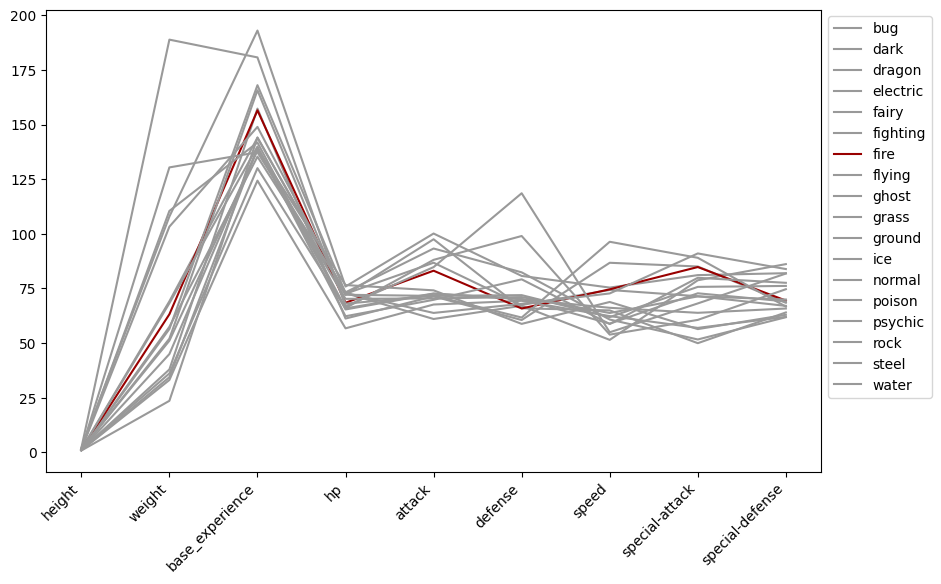

In [3]:
fig, ax = plt.subplots(figsize=(10,6))

colors = []
def set_colors(df):
    for col in df.columns:
        if 'fire' in col:
            colors.append('#990000')
        else:
            colors.append('#999999')
    return df

(pokemon
     .groupby('type_1')
     .mean()
     .loc[:, 'height':]
     .T
     .pipe(set_colors)
     .plot(ax=ax, color=colors, rot=45)
)

ax.legend(bbox_to_anchor=(1,1))
ax.set_xticklabels(ax.get_xticklabels(), ha='right');

# Day 37/100

### 🟢 `filter` method

###### It can take one of three parameters:
###### ✅ `items`: exact match
###### ✅ `like`: match with a substring
###### ✅ `regex`: match with a regular expression

In [4]:
# items: return a column named "city"
(fuel_econ
     .filter(items=['city'])
     .head(3)
)

city
0  16.4596
1  21.8706
2  17.4935

In [5]:
# like: return columns containing the substring "ity"
(fuel_econ
     .filter(like='ity')
     .head(3)
)

city    UCity
0  16.4596  20.2988
1  21.8706  26.9770
2  17.4935  21.2000

In [6]:
# regex: return columns starting with any character "\w" followed by "ity"
(fuel_econ
     .filter(regex=r'\wity')
     .head(3)
)

city    UCity
0  16.4596  20.2988
1  21.8706  26.9770
2  17.4935  21.2000

# Day 38/100

#### 🟢 `assign` method with a function

###### 🔢 Data

In [7]:
pokemon_stats = pokemon.select_dtypes('number')
pokemon_stats.head(1)

id  generation_id  height  weight  base_experience  hp  attack  defense  \
0   1              1     0.7     6.9               64  45      49       49   

   speed  special-attack  special-defense  
0     45              65               65

###### ❌ No function

In [8]:
(pokemon_stats
     .rename(columns = lambda c: c.replace('-', '_')) # "rename" method returns a new DataFrame object
     .assign(attack_ratio = pokemon_stats[['attack', 'special-attack']].mean(axis=1),
             defense_ratio = pokemon_stats[['defense', 'special-defense']].mean(axis=1)
            )
     .head(1)
)

id  generation_id  height  weight  base_experience  hp  attack  defense  \
0   1              1     0.7     6.9               64  45      49       49   

   speed  special_attack  special_defense  attack_ratio  defense_ratio  
0     45              65               65          57.0           57.0

###### ✅ With a function

In [9]:
(pokemon_stats
     .rename(columns = lambda c: c.replace('-', '_')) # "rename" method returns a new DataFrame object
     .assign(attack_ratio = lambda df_: df_[['attack', 'special_attack']].mean(axis=1),
             defense_ratio = lambda df_: df_[['defense', 'special_defense']].mean(axis=1)
            )
     .head(1)
)

id  generation_id  height  weight  base_experience  hp  attack  defense  \
0   1              1     0.7     6.9               64  45      49       49   

   speed  special_attack  special_defense  attack_ratio  defense_ratio  
0     45              65               65          57.0           57.0

# Day 39/100

### 🟢 `between` method

###### 🔢 Data

In [10]:
pokemon_stats.head(1)

id  generation_id  height  weight  base_experience  hp  attack  defense  \
0   1              1     0.7     6.9               64  45      49       49   

   speed  special-attack  special-defense  
0     45              65               65

##### 🥅 Goal
Select rows from the `pokemon_stats` DataFrame where the `attack` is above 70 but below 80.

###### ❌ Manually (Not recommended)

In [11]:
(pokemon_stats
     .loc[(pokemon_stats.attack > 70) & (pokemon_stats.attack < 80)]
     .head(2)
)

id  generation_id  height  weight  base_experience  hp  attack  defense  \
26  27              1     0.6    12.0               60  50      75       85   
32  33              1     0.9    19.5              128  61      72       57   

    speed  special-attack  special-defense  
26     40              20               30  
32     65              55               55

###### ✅ Using `between`

In [12]:
(pokemon_stats
     .loc[pokemon_stats.attack.between(70,80, inclusive='neither')]
     .head(2)
)

# inclusive: 'neither', 'both', 'left', 'right'

id  generation_id  height  weight  base_experience  hp  attack  defense  \
26  27              1     0.6    12.0               60  50      75       85   
32  33              1     0.9    19.5              128  61      72       57   

    speed  special-attack  special-defense  
26     40              20               30  
32     65              55               55

# Day 40/100

##### 🥅 Goal
Return the **3 highest** values in the `attack` column in `pokemon` DataFrame.

###### ❌ Manually (Not recommended)

In [13]:
(pokemon
     .attack
     .sort_values(ascending=False)
     .head(3)
)

797    181
408    165
288    160
Name: attack, dtype: int64

###### ✅ Using `nlargest`

In [14]:
(pokemon
     .attack
     .nlargest(n=3)
)

797    181
408    165
288    160
Name: attack, dtype: int64

##### ▶️ With `groupby`
Return the **3 highest** values in the `attack` column for each value in the `type_1` column.

In [15]:
(pokemon
     .groupby('type_1')
     .apply(lambda g: g.attack.nlargest(n=3).values)
)

type_1
bug         [139, 137, 135]
dark        [131, 130, 125]
dragon      [150, 150, 147]
electric    [123, 120, 115]
fairy        [131, 120, 80]
fighting    [140, 132, 130]
fire        [140, 130, 130]
flying        [115, 70, 30]
ghost       [131, 115, 110]
grass       [181, 130, 130]
ground      [150, 140, 135]
ice         [130, 130, 117]
normal      [160, 160, 130]
poison      [106, 105, 102]
psychic     [150, 137, 125]
rock        [165, 140, 135]
steel       [135, 120, 110]
water       [130, 125, 120]
dtype: object

# Day 41/100

### 🟢 `int64` vs `Int64`

###### 🔢 Data

In [16]:
ser = pd.Series([1, np.nan, 13, np.nan, 22, 7])

In [17]:
ser

0     1.0
1     NaN
2    13.0
3     NaN
4    22.0
5     7.0
dtype: float64

###### ❌ Convert to `int64`

In [18]:
# returns an error
try:
    ser.astype('int64')
except Exception as e:
    print(e)

Cannot convert non-finite values (NA or inf) to integer


###### ✅ Convert to `Int64` (nullable integer data type)

In [19]:
ser.astype('Int64')

0       1
1    <NA>
2      13
3    <NA>
4      22
5       7
dtype: Int64

# Day 42/100

### 🟢 `query`

In [20]:
pokemon.query('species == "charmander" & attack > 49')

# You can also use "and" instead of "&"
pokemon.query('species == "charmander" and attack > 49')

id     species  generation_id  height  weight  base_experience type_1  \
3   4  charmander              1     0.6     8.5               62   fire   

  type_2  hp  attack  defense  speed  special-attack  special-defense  
3    NaN  39      52       43     65              60               50

In [21]:
# Use "@" to refer to variables in the environment that are not part of the DataFrame

pokemon_species = 'charmander'
pokemon.query('species == @pokemon_species | species == "zeraora"')

# You can also use "or" instead of "|"
pokemon.query('species == @pokemon_species or species == "zeraora"')

id     species  generation_id  height  weight  base_experience  \
3      4  charmander              1     0.6     8.5               62   
806  807     zeraora              7     1.5    44.5              270   

       type_1 type_2  hp  attack  defense  speed  special-attack  \
3        fire    NaN  39      52       43     65              60   
806  electric    NaN  88     112       75    143             102   

     special-defense  
3                 50  
806               80

# Day 43/100

In [22]:
names_list = ['Brady Browning', 'Elian Collins', 'Corbin Avery',
              'Armani Vang', 'Bria Blankenship', 'Chaz Newton','Tyshawn Santos',
              'Makena Kaiser', 'Jamari Blackburn', 'Dustin Cook']

### ❓Pandas Challenge (`sort_values`)

##### 🔢 Data

In [23]:
names = pd.Series(names_list)

In [24]:
names

0      Brady Browning
1       Elian Collins
2        Corbin Avery
3         Armani Vang
4    Bria Blankenship
5         Chaz Newton
6      Tyshawn Santos
7       Makena Kaiser
8    Jamari Blackburn
9         Dustin Cook
dtype: object

##### 🥅 Goal
Sort the values of the `name` series in descending order using the **last** name.

##### ✅ Solution

In [25]:
(names
     .sort_values(ascending = False,
                  key = lambda ser: ser.str.split()
                                    .apply(lambda val: val[-1]))
)

3         Armani Vang
6      Tyshawn Santos
5         Chaz Newton
7       Makena Kaiser
9         Dustin Cook
1       Elian Collins
0      Brady Browning
4    Bria Blankenship
8    Jamari Blackburn
2        Corbin Avery
dtype: object

# Day 44/100

In [26]:
pkmn_by_type = pokemon.set_index(['type_1', 'type_2'])

In [27]:
# MultiIndex Axis
pkmn_by_type.head(3)

id    species  generation_id  height  weight  base_experience  \
type_1 type_2                                                                  
grass  poison   1  bulbasaur              1     0.7     6.9               64   
       poison   2    ivysaur              1     1.0    13.0              142   
       poison   3   venusaur              1     2.0   100.0              236   

               hp  attack  defense  speed  special-attack  special-defense  
type_1 type_2                                                               
grass  poison  45      49       49     45              65               65  
       poison  60      62       63     60              80               80  
       poison  80      82       83     80             100              100

In [28]:
# grouping by the first level (level = 0) --> 'type_1'
(pkmn_by_type
     .groupby(level=0)
     .attack
     .mean()
     .head(5)
)

type_1
bug          67.625000
dark         86.758621
dragon      100.111111
electric     71.350000
fairy        61.000000
Name: attack, dtype: float64

In [29]:
# grouping by the second level (level = 1) --> 'type_2'
(pkmn_by_type
     .groupby(level=1)
     .attack
     .mean()
     .head(5)
)

type_2
bug         76.000000
dark        99.529412
dragon      86.500000
electric    73.500000
fairy       60.034483
Name: attack, dtype: float64